<a href="https://colab.research.google.com/github/Gyanendratiwari98/Machine-Learning-ML-/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset
License(s): other
gender-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gender-classification-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout,Input

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Training',
    labels="inferred",
    label_mode="int",
     batch_size=32,
    image_size=(256, 256)
)

Found 47009 files belonging to 2 classes.


In [8]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Validation',
    labels="inferred",
    label_mode="int",
     batch_size=32,
    image_size=(256, 256)
)

Found 11649 files belonging to 2 classes.


In [9]:
def process(image, label):
    image = tf.image.resize(image, (256, 256))  # Ensure consistent resizing
    image = tf.cast(image / 255.0, tf.float32)  # Normalize
    return image, label
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [10]:
model = Sequential()
model.add(Input(shape=(256,256,3)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 141s 87ms/step - accuracy: 0.8095 - loss: 1.3303 - val_accuracy: 0.9233 - val_loss: 0.1883
Epoch 2/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 133s 88ms/step - accuracy: 0.9174 - loss: 0.2126 - val_accuracy: 0.9386 - val_loss: 0.1622
Epoch 3/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 134s 83ms/step - accuracy: 0.9369 - loss: 0.1653 - val_accuracy: 0.9464 - val_loss: 0.1356
Epoch 4/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 121s 83ms/step - accuracy: 0.9406 - loss: 0.1519 - val_accuracy: 0.9177 - val_loss: 0.2069
Epoch 5/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 142s 83ms/step - accuracy: 0.9506 - loss: 0.1271 - val_accuracy: 0.8927 - val_loss: 0.2998
Epoch 6/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 121s 82ms/step - accuracy: 0.9594 - loss: 0.1110 - val_accuracy: 0.8598 - val_loss: 0.3274
Epoch 7/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 151s 89ms/step - accuracy: 0.9637 - loss: 0.0979 - val_accuracy: 0.9367 - val_loss: 0.1718
Epoch 8/10
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 130s 88ms/step - accuracy: 

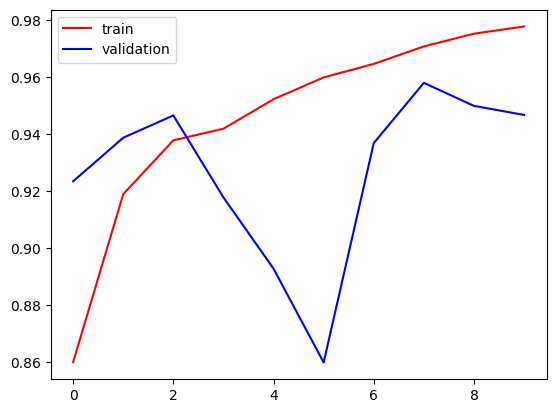

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

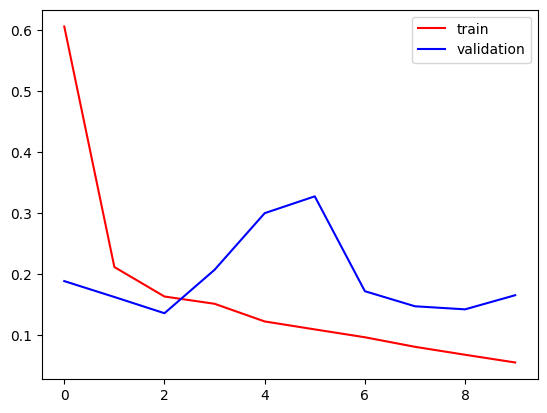

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

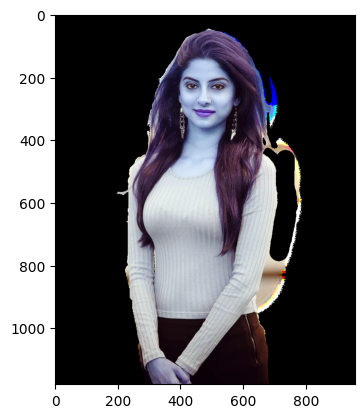

In [16]:
import cv2
img = cv2.imread('/content/R.png')
plt.imshow(img)
img = cv2.resize(img,(256,256))
test_input =  img.reshape((1,256,256,3))

In [17]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


array([[1.]], dtype=float32)

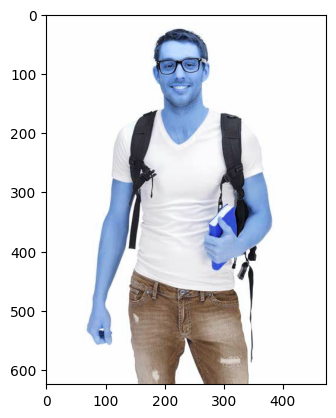

In [18]:
import cv2
image  = cv2.imread('/content/OIP (1).jpg')
plt.imshow(image)
image = cv2.resize(image,(256,256))
test_input_image =  image.reshape((1,256,256,3))

In [19]:
model.predict(test_input_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1.]], dtype=float32)